In [1]:
import os

os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
from pathlib import Path
root_path = Path.cwd().parent.absolute()
import sys
sys.path.append(str(root_path))
import os

In [2]:

from flax import nnx
import jax
from jax._src.tree_util import tree_structure
import jax.numpy as jnp
from jaxtyping import Array

In [3]:
from architectures.node import NeuralODE
from architectures.utils_node import eval_model
from architectures.architectures import MLP,ResNet
from geometry.G_matrix import G_matrix
from functionals.functions import create_potentials
from functionals.linear_funcitonal_class import LinearPotential
from functionals.functions import zero_potential_fn
from functionals.internal_functional_class import InternalPotential
from functionals.interaction_functional_class import InteractionPotential
from functionals.functional import Potential
from flows.hamiltonian_flow_step import hamiltonian_flow_step
from flows.hamiltonian_flow import initialize_momentum, run_hamiltonian_flow
from parametric_model.parametric_model import ParametricModel


In [4]:
device = 0

In [33]:
# Define the parametric model
parametric_model = ParametricModel(
    parametric_map="node", # "node" "resnet"
    architecture=[2, 1, 16], # [input_dim, num_layers, hidden_width]
    time_dependent=True,    # True or False
    solver="heun", # "euler" or "heun"
    dt0=0.2,
    rhs_model="mlp", # "mlp" or "resnet"
    ref_density="gaussian",
    scale_factor=1e-4
)

In [34]:
def phi_fn(t: float,x: Array) -> Array:
    ''' phi(t,x) = -x[0]^2/2 '''
    return -x[0]**2/2

In [35]:
n_samples = 2_000  # Monte Carlo sample size
key = jax.random.PRNGKey(1234)
rngs = nnx.Rngs(key)
# Generate reference samples from lambda = N(0, I)
key, subkey = jax.random.split(key)
z_samples = jax.random.normal(subkey, (n_samples, 2))
G_mat = G_matrix(parametric_model)

In [36]:
p = initialize_momentum(node = parametric_model,z_samples=z_samples,phi_fn=phi_fn)

In [37]:
zero_potential = LinearPotential(zero_potential_fn)
potential = Potential(zero_potential)

# Initialize the variable for a Hamiltonian step

In [38]:
step_size = 1e-6
solver = 'cg'
gamma = 1e-2

In [39]:
updated_node,p_new,step_info = hamiltonian_flow_step(node = parametric_model,
                      p_n = p,
                      z_samples = z_samples,
                      G_mat = G_mat,
                      potential = potential,
                      step_size = step_size)

2025-09-29 13:13:44.783166: W external/xla/xla/service/gpu/autotuning/dot_search_space.cc:200] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs?Working around this by using the full hints set instead.


Initial Hamiltonian: 0.605894


Hamiltonian Flow Progress:   1%|          | 1/99 [00:05<08:43,  5.34s/it, Energy=0.000000, Hamiltonian=0.605778, H_drift=1.15e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   2%|▏         | 2/99 [00:10<08:34,  5.30s/it, Energy=0.000000, Hamiltonian=0.607008, H_drift=1.11e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   3%|▎         | 3/99 [00:15<08:27,  5.29s/it, Energy=0.000000, Hamiltonian=0.606567, H_drift=6.73e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   4%|▍         | 4/99 [00:21<08:25,  5.32s/it, Energy=0.000000, Hamiltonian=0.605804, H_drift=9.02e-05, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   5%|▌         | 5/99 [00:26<08:18,  5.30s/it, Energy=0.000000, Hamiltonian=0.609209, H_drift=3.32e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   5%|▌         | 5/99 [00:31<08:18,  5.30s/it, Energy=0.000000, Hamiltonian=0.605920, H_drift=2.62e-05, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter   5: Energy = 0.000000, Hamiltonian = 0.605920, H_drift = 2.62e-05


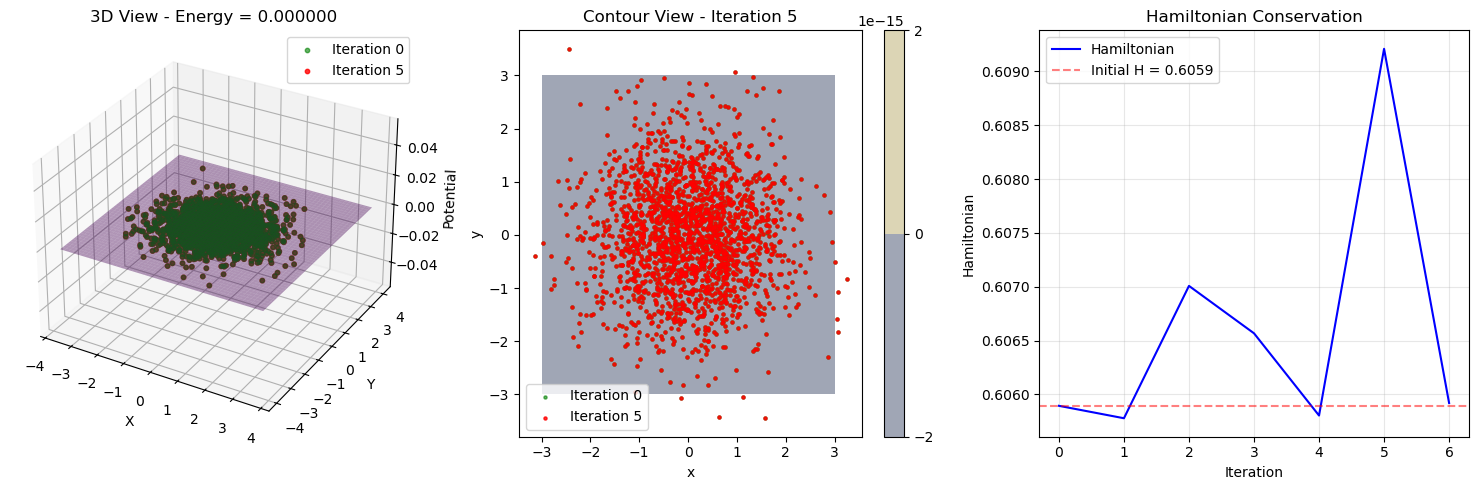

Hamiltonian Flow Progress:   6%|▌         | 6/99 [00:32<08:45,  5.65s/it, Energy=0.000000, Hamiltonian=0.605920, H_drift=2.62e-05, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   7%|▋         | 7/99 [00:38<08:27,  5.52s/it, Energy=0.000000, Hamiltonian=0.608423, H_drift=2.53e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   8%|▊         | 8/99 [00:43<08:15,  5.44s/it, Energy=0.000000, Hamiltonian=0.605935, H_drift=4.09e-05, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:   9%|▉         | 9/99 [00:48<08:03,  5.37s/it, Energy=0.000000, Hamiltonian=0.609121, H_drift=3.23e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  10%|█         | 10/99 [00:53<07:49,  5.28s/it, Energy=0.000000, Hamiltonian=0.607630, H_drift=1.74e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  10%|█         | 10/99 [00:58<07:49,  5.28s/it, Energy=0.000000, Hamiltonian=0.608653, H_drift=2.76e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  10: Energy = 0.000000, Hamiltonian = 0.608653, H_drift = 2.76e-03


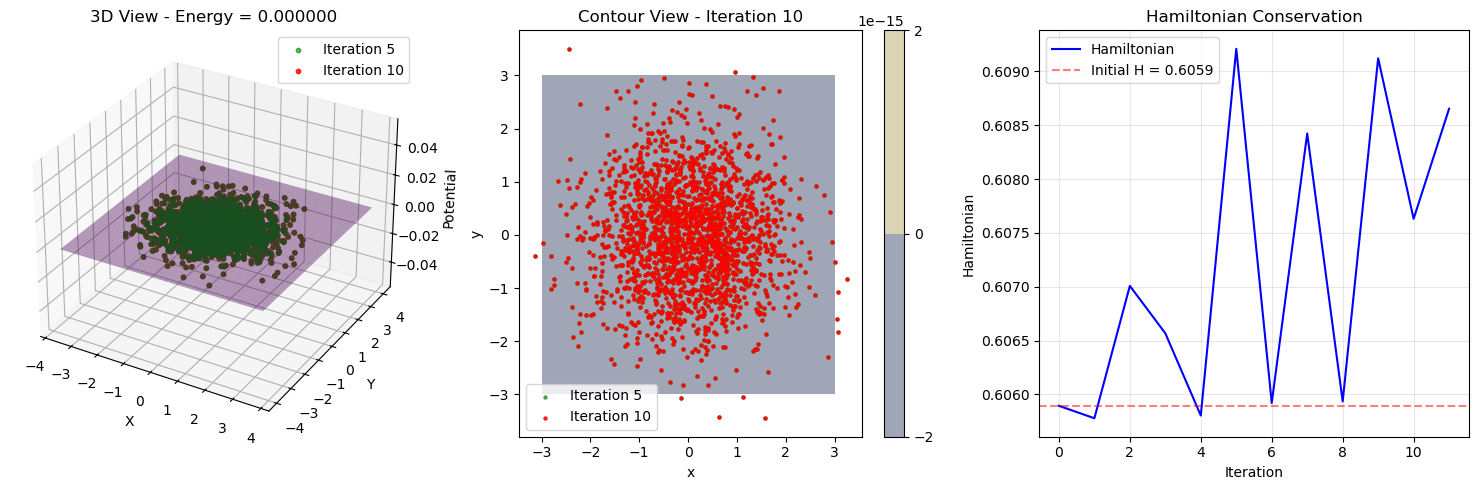

Hamiltonian Flow Progress:  11%|█         | 11/99 [00:59<08:07,  5.54s/it, Energy=0.000000, Hamiltonian=0.608653, H_drift=2.76e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  12%|█▏        | 12/99 [01:04<07:48,  5.39s/it, Energy=0.000000, Hamiltonian=0.607392, H_drift=1.50e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  13%|█▎        | 13/99 [01:09<07:33,  5.27s/it, Energy=0.000000, Hamiltonian=0.606638, H_drift=7.44e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  14%|█▍        | 14/99 [01:14<07:22,  5.21s/it, Energy=0.000000, Hamiltonian=0.607458, H_drift=1.56e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  15%|█▌        | 15/99 [01:19<07:13,  5.17s/it, Energy=0.000000, Hamiltonian=0.605739, H_drift=1.55e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  15%|█▌        | 15/99 [01:25<07:13,  5.17s/it, Energy=0.000000, Hamiltonian=0.608263, H_drift=2.37e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  15: Energy = 0.000000, Hamiltonian = 0.608263, H_drift = 2.37e-03


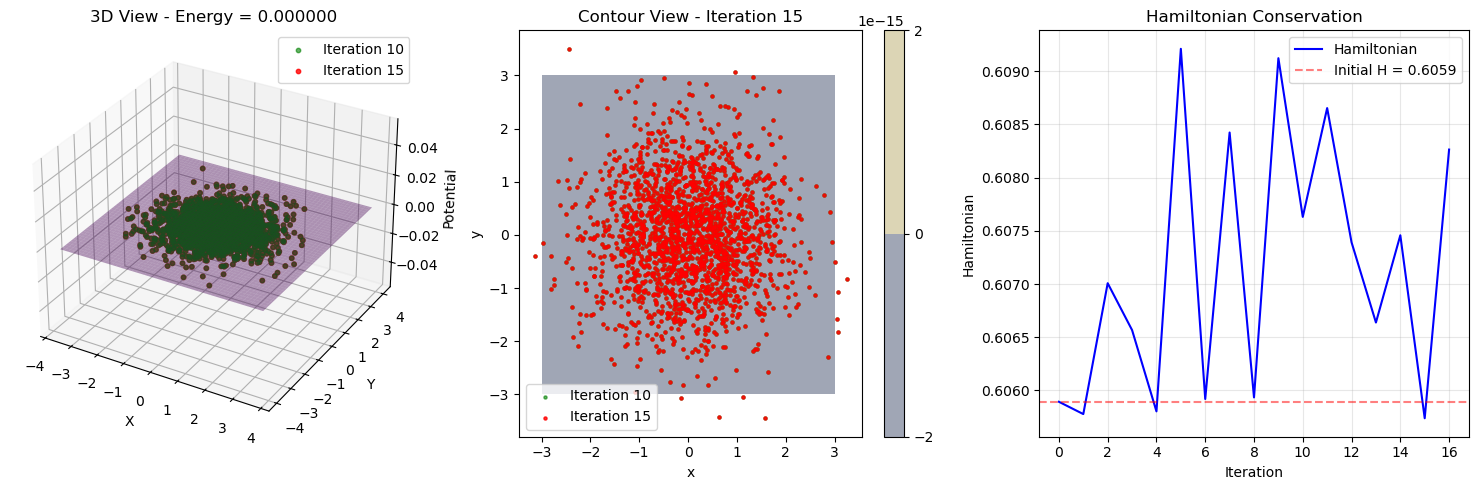

Hamiltonian Flow Progress:  16%|█▌        | 16/99 [01:26<07:32,  5.45s/it, Energy=0.000000, Hamiltonian=0.608263, H_drift=2.37e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  17%|█▋        | 17/99 [01:31<07:16,  5.32s/it, Energy=0.000000, Hamiltonian=0.607627, H_drift=1.73e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  18%|█▊        | 18/99 [01:36<07:04,  5.24s/it, Energy=0.000000, Hamiltonian=0.606977, H_drift=1.08e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  19%|█▉        | 19/99 [01:41<06:53,  5.17s/it, Energy=0.000000, Hamiltonian=0.607600, H_drift=1.71e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  20%|██        | 20/99 [01:46<06:45,  5.13s/it, Energy=0.000000, Hamiltonian=0.607868, H_drift=1.97e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  20%|██        | 20/99 [01:51<06:45,  5.13s/it, Energy=0.000000, Hamiltonian=0.610034, H_drift=4.14e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  20: Energy = 0.000000, Hamiltonian = 0.610034, H_drift = 4.14e-03


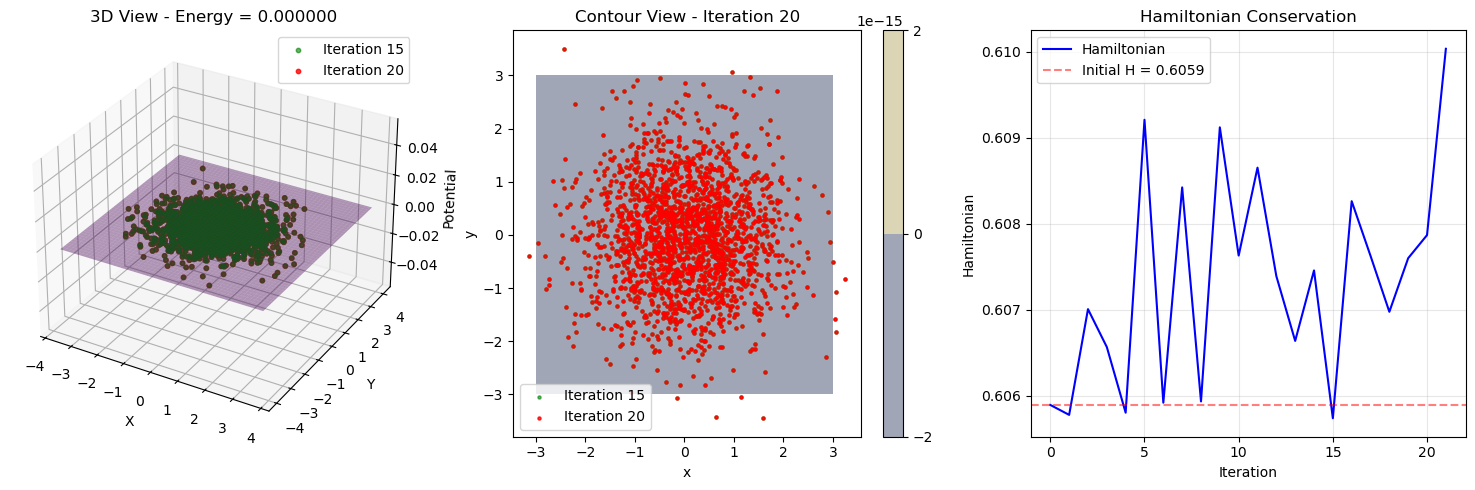

Hamiltonian Flow Progress:  21%|██        | 21/99 [01:53<07:37,  5.87s/it, Energy=0.000000, Hamiltonian=0.610034, H_drift=4.14e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  22%|██▏       | 22/99 [01:58<07:15,  5.66s/it, Energy=0.000000, Hamiltonian=0.605788, H_drift=1.06e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  23%|██▎       | 23/99 [02:04<06:56,  5.48s/it, Energy=0.000000, Hamiltonian=0.606509, H_drift=6.15e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  24%|██▍       | 24/99 [02:09<06:42,  5.37s/it, Energy=0.000000, Hamiltonian=0.606333, H_drift=4.39e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  25%|██▌       | 25/99 [02:14<06:29,  5.26s/it, Energy=0.000000, Hamiltonian=0.608067, H_drift=2.17e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  25%|██▌       | 25/99 [02:19<06:29,  5.26s/it, Energy=0.000000, Hamiltonian=0.607157, H_drift=1.26e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  25: Energy = 0.000000, Hamiltonian = 0.607157, H_drift = 1.26e-03


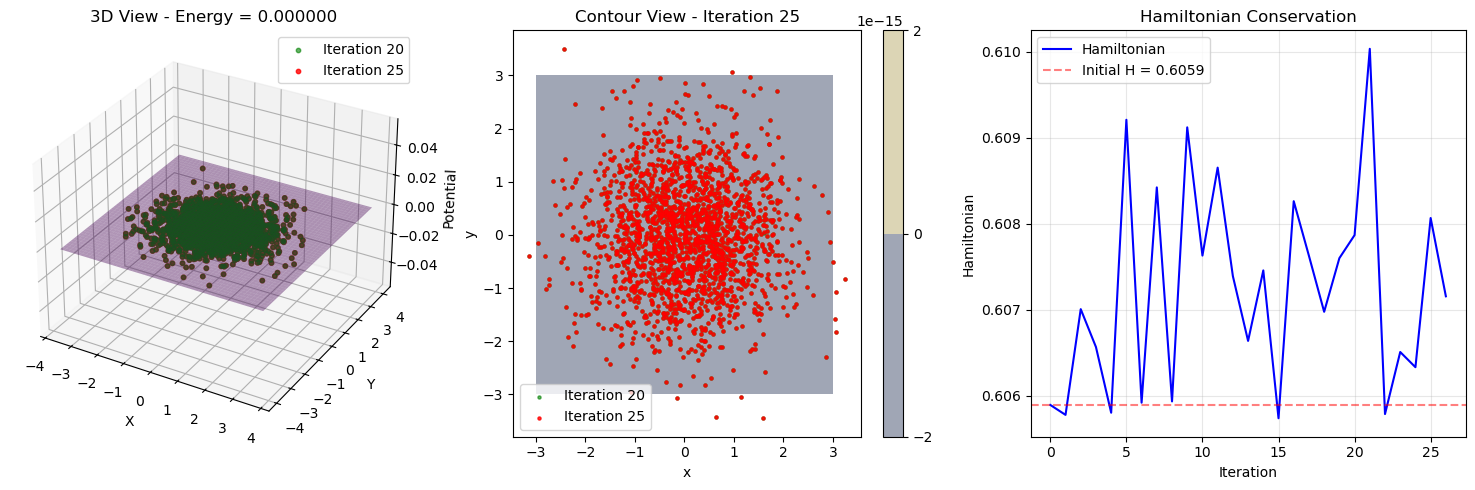

Hamiltonian Flow Progress:  26%|██▋       | 26/99 [02:20<06:41,  5.50s/it, Energy=0.000000, Hamiltonian=0.607157, H_drift=1.26e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  27%|██▋       | 27/99 [02:25<06:25,  5.35s/it, Energy=0.000000, Hamiltonian=0.608316, H_drift=2.42e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  28%|██▊       | 28/99 [02:30<06:13,  5.26s/it, Energy=0.000000, Hamiltonian=0.607493, H_drift=1.60e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  29%|██▉       | 29/99 [02:35<06:03,  5.19s/it, Energy=0.000000, Hamiltonian=0.607245, H_drift=1.35e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  30%|███       | 30/99 [02:40<05:54,  5.14s/it, Energy=0.000000, Hamiltonian=0.608085, H_drift=2.19e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  30%|███       | 30/99 [02:45<05:54,  5.14s/it, Energy=0.000000, Hamiltonian=0.608151, H_drift=2.26e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  30: Energy = 0.000000, Hamiltonian = 0.608151, H_drift = 2.26e-03


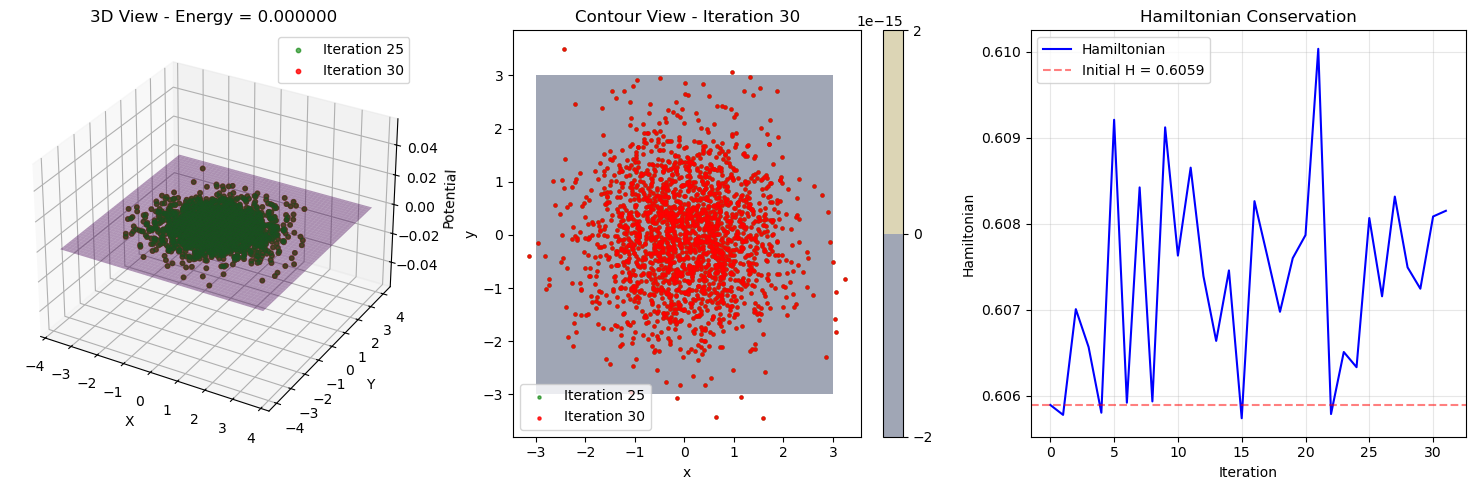

Hamiltonian Flow Progress:  31%|███▏      | 31/99 [02:46<06:08,  5.42s/it, Energy=0.000000, Hamiltonian=0.608151, H_drift=2.26e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  32%|███▏      | 32/99 [02:51<05:55,  5.31s/it, Energy=0.000000, Hamiltonian=0.607739, H_drift=1.85e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  33%|███▎      | 33/99 [02:56<05:44,  5.22s/it, Energy=0.000000, Hamiltonian=0.607345, H_drift=1.45e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  34%|███▍      | 34/99 [03:01<05:34,  5.14s/it, Energy=0.000000, Hamiltonian=0.608088, H_drift=2.19e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  35%|███▌      | 35/99 [03:06<05:26,  5.10s/it, Energy=0.000000, Hamiltonian=0.608015, H_drift=2.12e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  35%|███▌      | 35/99 [03:11<05:26,  5.10s/it, Energy=0.000000, Hamiltonian=0.607771, H_drift=1.88e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  35: Energy = 0.000000, Hamiltonian = 0.607771, H_drift = 1.88e-03


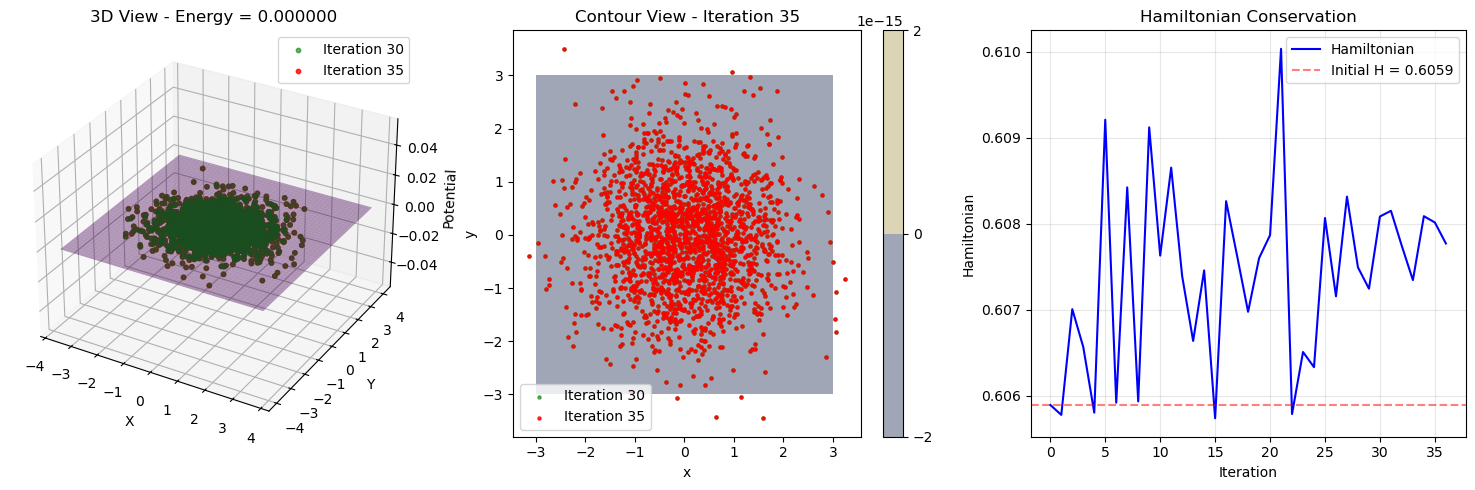

Hamiltonian Flow Progress:  36%|███▋      | 36/99 [03:12<05:39,  5.38s/it, Energy=0.000000, Hamiltonian=0.607771, H_drift=1.88e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  37%|███▋      | 37/99 [03:17<05:26,  5.27s/it, Energy=0.000000, Hamiltonian=0.606646, H_drift=7.52e-04, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  38%|███▊      | 38/99 [03:22<05:16,  5.18s/it, Energy=0.000000, Hamiltonian=0.610320, H_drift=4.43e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  39%|███▉      | 39/99 [03:27<05:07,  5.13s/it, Energy=0.000000, Hamiltonian=0.608403, H_drift=2.51e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  40%|████      | 40/99 [03:32<05:01,  5.11s/it, Energy=0.000000, Hamiltonian=0.608888, H_drift=2.99e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  40%|████      | 40/99 [03:37<05:01,  5.11s/it, Energy=0.000000, Hamiltonian=0.611536, H_drift=5.64e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  40: Energy = 0.000000, Hamiltonian = 0.611536, H_drift = 5.64e-03


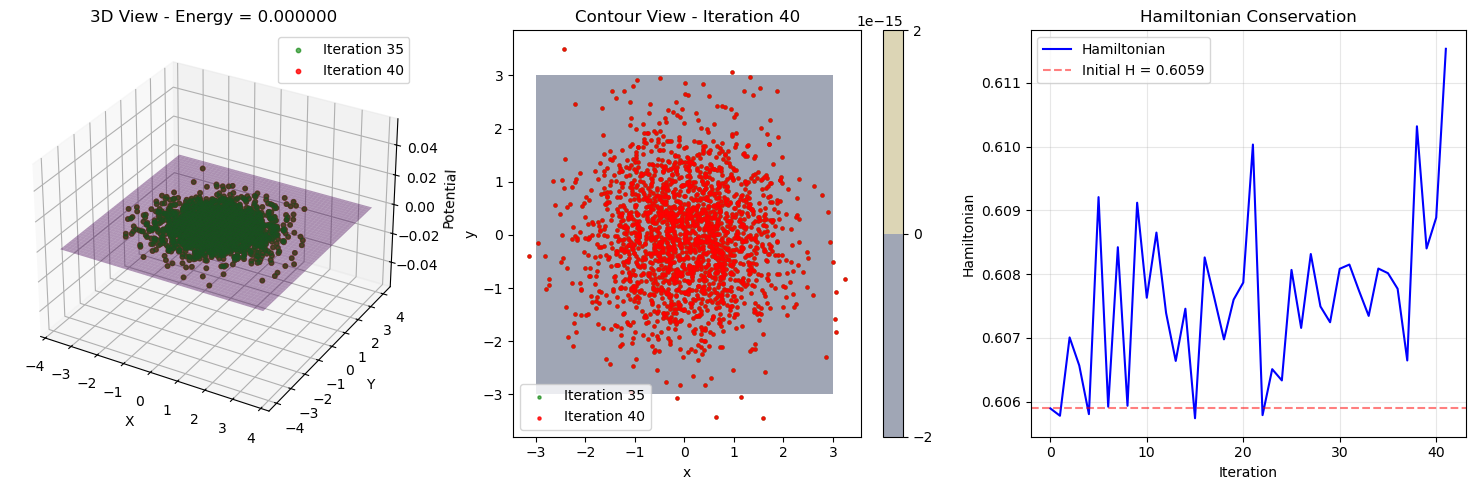

Hamiltonian Flow Progress:  41%|████▏     | 41/99 [03:38<05:12,  5.39s/it, Energy=0.000000, Hamiltonian=0.611536, H_drift=5.64e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  42%|████▏     | 42/99 [03:43<05:00,  5.27s/it, Energy=0.000000, Hamiltonian=0.612424, H_drift=6.53e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  43%|████▎     | 43/99 [03:48<04:51,  5.20s/it, Energy=0.000000, Hamiltonian=0.612291, H_drift=6.40e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  44%|████▍     | 44/99 [03:53<04:42,  5.13s/it, Energy=0.000000, Hamiltonian=0.613967, H_drift=8.07e-03, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  45%|████▌     | 45/99 [03:58<04:35,  5.09s/it, Energy=0.000000, Hamiltonian=0.618658, H_drift=1.28e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  45%|████▌     | 45/99 [04:03<04:35,  5.09s/it, Energy=0.000000, Hamiltonian=0.621002, H_drift=1.51e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  45: Energy = 0.000000, Hamiltonian = 0.621002, H_drift = 1.51e-02


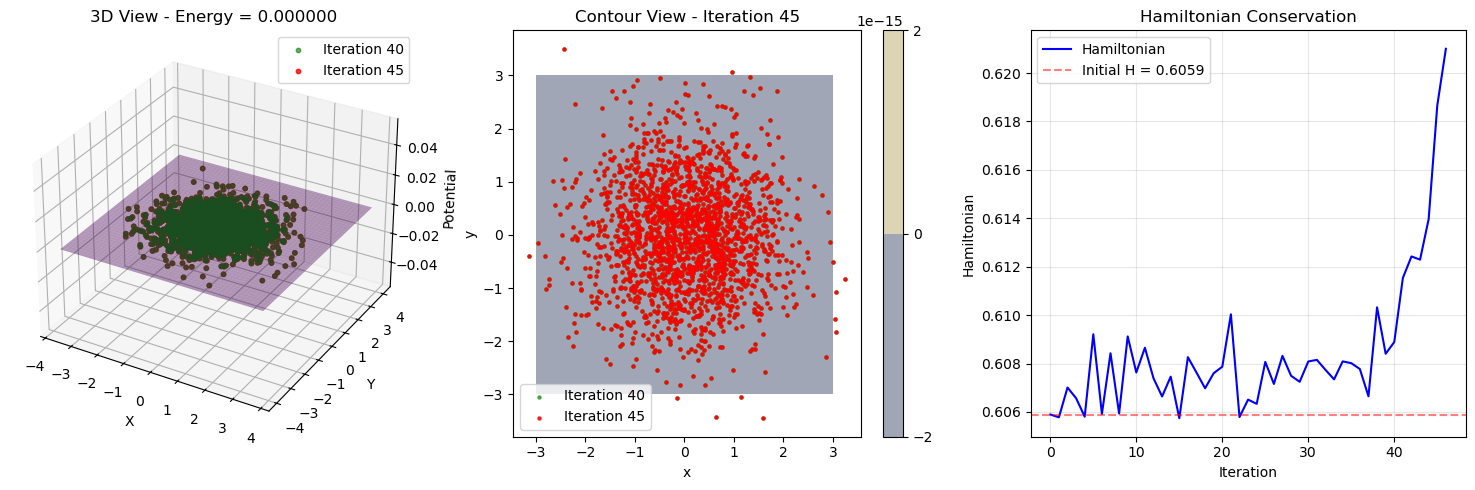

Hamiltonian Flow Progress:  46%|████▋     | 46/99 [04:04<04:45,  5.39s/it, Energy=0.000000, Hamiltonian=0.621002, H_drift=1.51e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  47%|████▋     | 47/99 [04:09<04:34,  5.27s/it, Energy=0.000000, Hamiltonian=0.626224, H_drift=2.03e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  48%|████▊     | 48/99 [04:14<04:24,  5.19s/it, Energy=0.000000, Hamiltonian=0.633681, H_drift=2.78e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  49%|████▉     | 49/99 [04:19<04:16,  5.13s/it, Energy=0.000000, Hamiltonian=0.645420, H_drift=3.95e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  51%|█████     | 50/99 [04:24<04:09,  5.09s/it, Energy=0.000000, Hamiltonian=0.666971, H_drift=6.11e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  51%|█████     | 50/99 [04:29<04:09,  5.09s/it, Energy=0.000000, Hamiltonian=0.700620, H_drift=9.47e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  50: Energy = 0.000000, Hamiltonian = 0.700620, H_drift = 9.47e-02


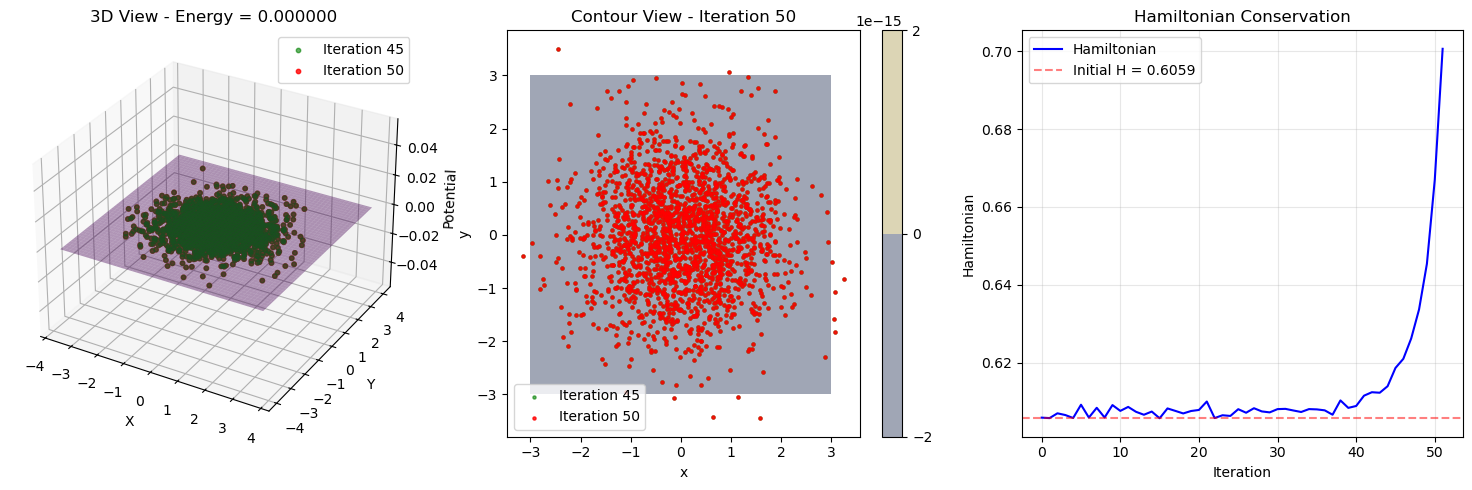

Hamiltonian Flow Progress:  52%|█████▏    | 51/99 [04:30<04:17,  5.36s/it, Energy=0.000000, Hamiltonian=0.700620, H_drift=9.47e-02, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  53%|█████▎    | 52/99 [04:35<04:06,  5.25s/it, Energy=0.000000, Hamiltonian=0.782437, H_drift=1.77e-01, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  54%|█████▎    | 53/99 [04:40<03:58,  5.19s/it, Energy=0.000000, Hamiltonian=1.026058, H_drift=4.20e-01, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  55%|█████▍    | 54/99 [04:45<03:50,  5.13s/it, Energy=0.000000, Hamiltonian=2.506407, H_drift=1.90e+00, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  56%|█████▌    | 55/99 [04:50<03:44,  5.10s/it, Energy=0.000000, Hamiltonian=62.633503, H_drift=6.20e+01, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  56%|█████▌    | 55/99 [04:55<03:44,  5.10s/it, Energy=0.000000, Hamiltonian=1423162.250000, H_drift=1.42e+06, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  55: Energy = 0.000000, Hamiltonian = 1423162.250000, H_drift = 1.42e+06


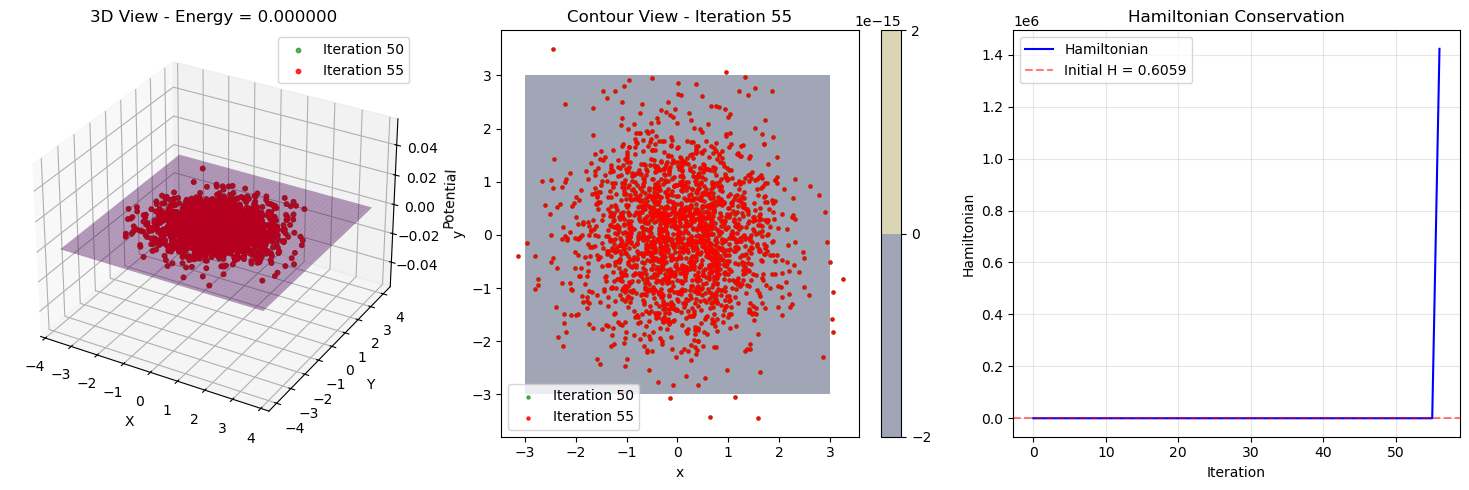

Hamiltonian Flow Progress:  57%|█████▋    | 56/99 [04:56<03:51,  5.39s/it, Energy=0.000000, Hamiltonian=1423162.250000, H_drift=1.42e+06, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  58%|█████▊    | 57/99 [05:01<03:41,  5.27s/it, Energy=0.000000, Hamiltonian=1061667124742717440.000000, H_drift=1.06e+18, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  59%|█████▊    | 58/99 [05:06<03:32,  5.19s/it, Energy=0.000000, Hamiltonian=5487411295823069184.000000, H_drift=5.49e+18, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  60%|█████▉    | 59/99 [05:11<03:25,  5.13s/it, Energy=0.000000, Hamiltonian=835766069904801792.000000, H_drift=8.36e+17, Linear=0.000000, Internal=0.000000, Interaction=0.000000] 

Hamiltonian Flow Progress:  61%|██████    | 60/99 [05:18<03:35,  5.52s/it, Energy=0.000000, Hamiltonian=731818378053812224.000000, H_drift=7.32e+17, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  61%|██████    | 60/99 [05:23<03:35,  5.52s/it, Energy=0.000000, Hamiltonian=770384091995439104.000000, H_drift=7.70e+17, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  60: Energy = 0.000000, Hamiltonian = 770384091995439104.000000, H_drift = 7.70e+17


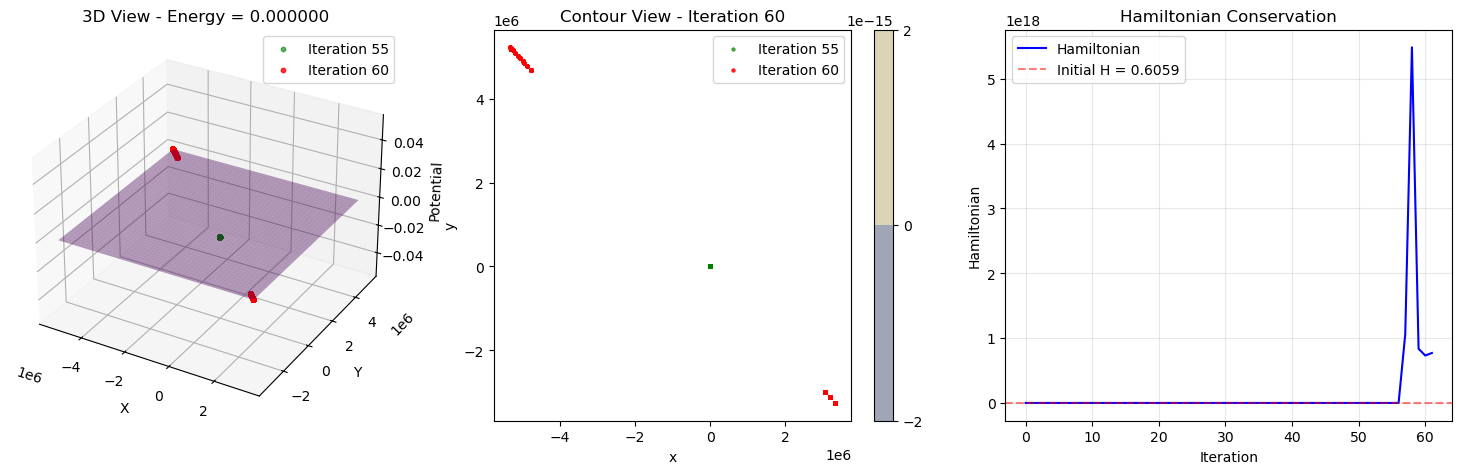

Hamiltonian Flow Progress:  62%|██████▏   | 61/99 [05:24<03:35,  5.68s/it, Energy=0.000000, Hamiltonian=770384091995439104.000000, H_drift=7.70e+17, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  63%|██████▎   | 62/99 [05:29<03:23,  5.49s/it, Energy=0.000000, Hamiltonian=775735552526778368.000000, H_drift=7.76e+17, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  64%|██████▎   | 63/99 [05:34<03:12,  5.34s/it, Energy=0.000000, Hamiltonian=908451278923759616.000000, H_drift=9.08e+17, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  65%|██████▍   | 64/99 [05:39<03:03,  5.23s/it, Energy=0.000000, Hamiltonian=1556706609091917626998784.000000, H_drift=1.56e+24, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  66%|██████▌   | 65/99 [05:44<02:55,  5.17s/it, Energy=0.000000, Hamiltonian=348518799896660396392579072.000000, H_drift=3.49e+26, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  66%|██████▌   | 65/99 [05:49<02:55,  5.17s/it, Energy=0.000000, Hamiltonian=4238816225081345739805687808.000000, H_drift=4.24e+27, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  65: Energy = 0.000000, Hamiltonian = 4238816225081345739805687808.000000, H_drift = 4.24e+27


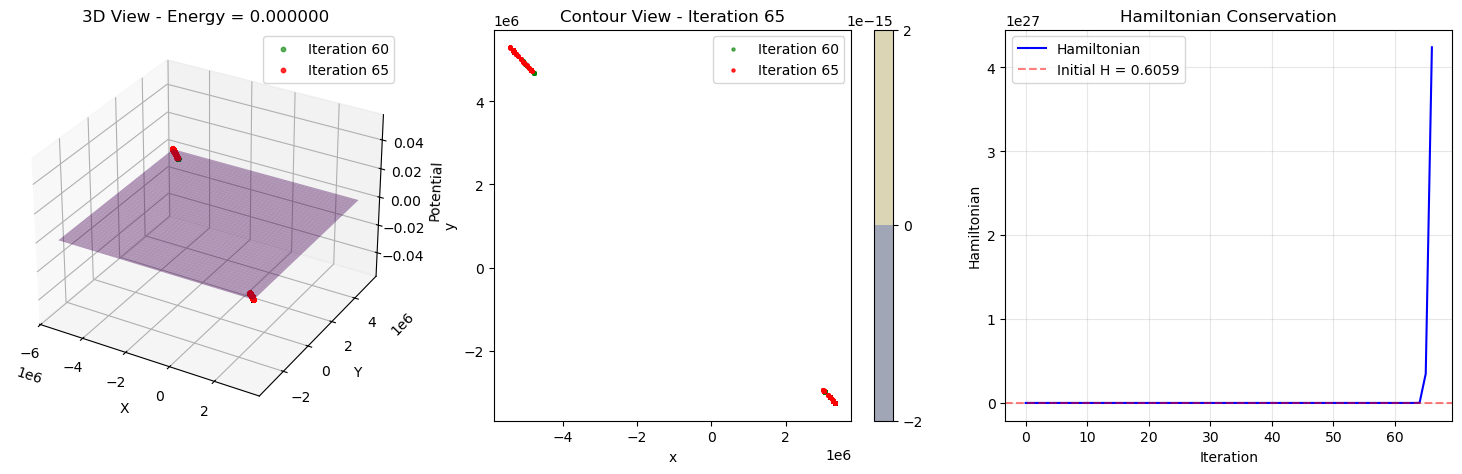

Hamiltonian Flow Progress:  67%|██████▋   | 66/99 [05:50<02:58,  5.41s/it, Energy=0.000000, Hamiltonian=4238816225081345739805687808.000000, H_drift=4.24e+27, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  68%|██████▊   | 67/99 [05:55<02:48,  5.28s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  69%|██████▊   | 68/99 [06:00<02:41,  5.20s/it, Energy=0.000000, Hamiltonian=196513309829997201606838321152.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  70%|██████▉   | 69/99 [06:05<02:33,  5.13s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  71%|███████   | 70/99 [06:10<02:27,  5.09s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  71%|███████   | 70/99 [06:15<02:27,  5.09s/it, Energy=0.000000, Hamiltonian=196513272051065338649676611584.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  70: Energy = 0.000000, Hamiltonian = 196513272051065338649676611584.000000, H_drift = 1.97e+29


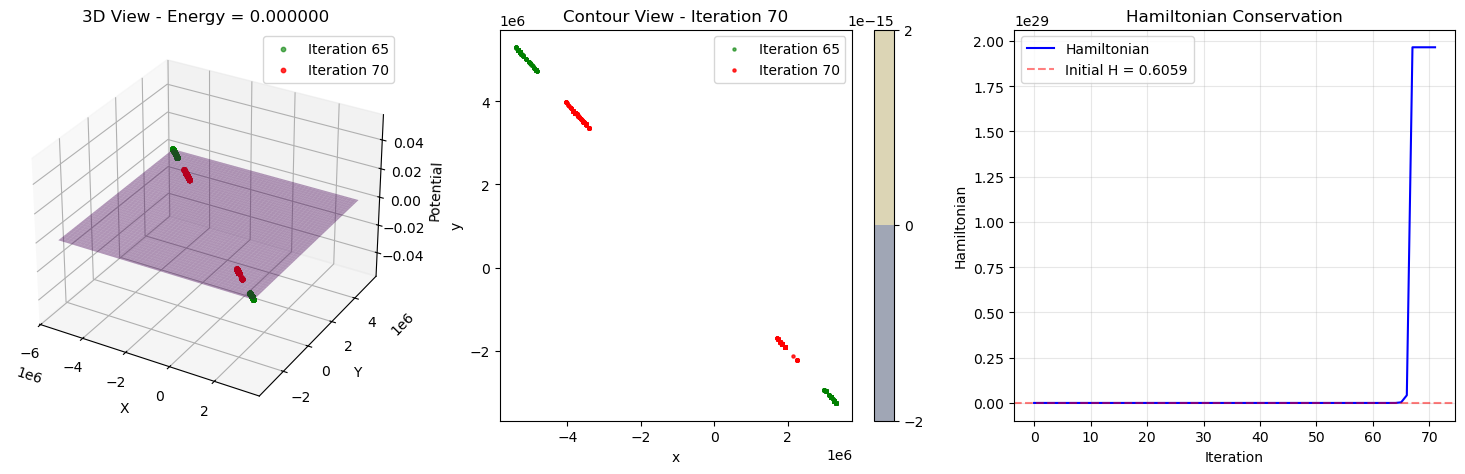

Hamiltonian Flow Progress:  72%|███████▏  | 71/99 [06:16<02:30,  5.36s/it, Energy=0.000000, Hamiltonian=196513272051065338649676611584.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  73%|███████▎  | 72/99 [06:21<02:21,  5.24s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  74%|███████▎  | 73/99 [06:26<02:14,  5.17s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  75%|███████▍  | 74/99 [06:31<02:07,  5.12s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  76%|███████▌  | 75/99 [06:36<02:01,  5.07s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  76%|███████▌  | 75/99 [06:41<02:01,  5.07s/it, Energy=0.000000, Hamiltonian=196513309829997201606838321152.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  75: Energy = 0.000000, Hamiltonian = 196513309829997201606838321152.000000, H_drift = 1.97e+29


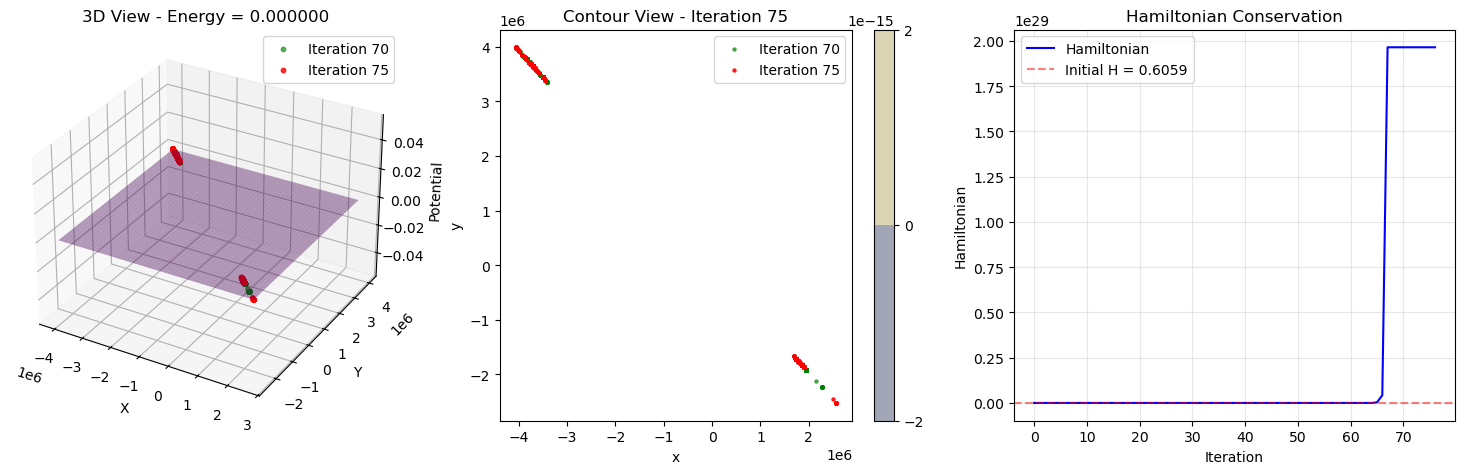

Hamiltonian Flow Progress:  77%|███████▋  | 76/99 [06:42<02:03,  5.36s/it, Energy=0.000000, Hamiltonian=196513309829997201606838321152.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  78%|███████▊  | 77/99 [06:47<01:55,  5.25s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  79%|███████▉  | 78/99 [06:52<01:48,  5.18s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  80%|███████▉  | 79/99 [06:57<01:42,  5.13s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  81%|████████  | 80/99 [07:02<01:36,  5.08s/it, Energy=0.000000, Hamiltonian=196513290940531270128257466368.000000, H_drift=1.97e+29, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Hamiltonian Flow Progress:  81%|████████  | 80/99 [07:07<01:36,  5.08s/it, Energy=0.000000, Hamiltonian=nan, H_drift=nan, Linear=0.000000, Internal=0.000000, Interaction=0.000000]                                       

Iter  80: Energy = 0.000000, Hamiltonian = nan, H_drift = nan


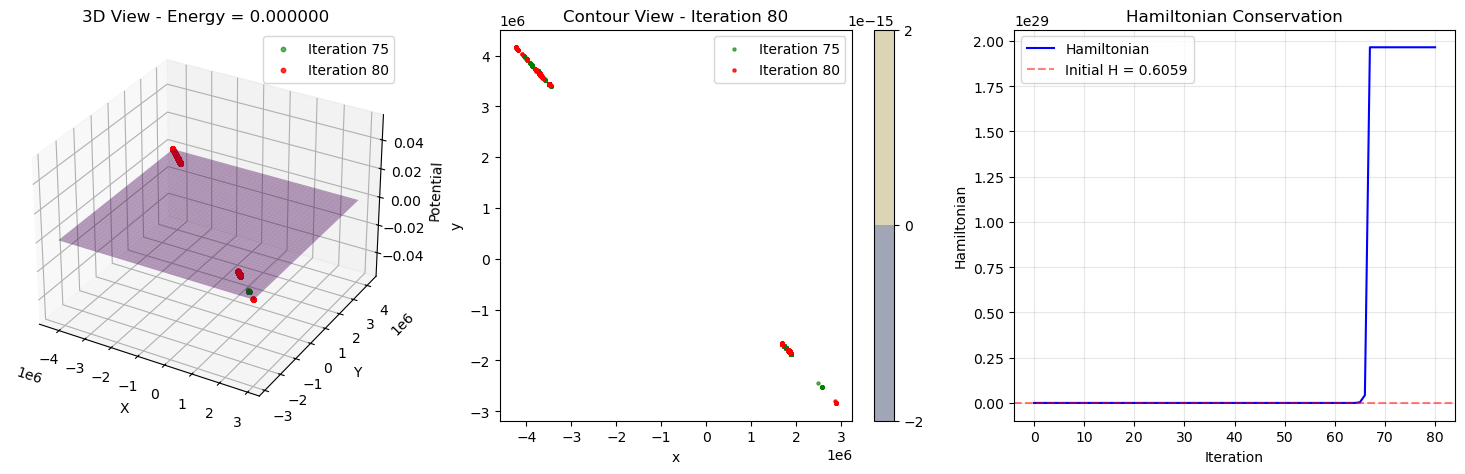

Hamiltonian Flow Progress:  86%|████████▌ | 85/99 [07:32<01:11,  5.07s/it, Energy=0.000000, Hamiltonian=nan, H_drift=nan, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  85: Energy = 0.000000, Hamiltonian = nan, H_drift = nan


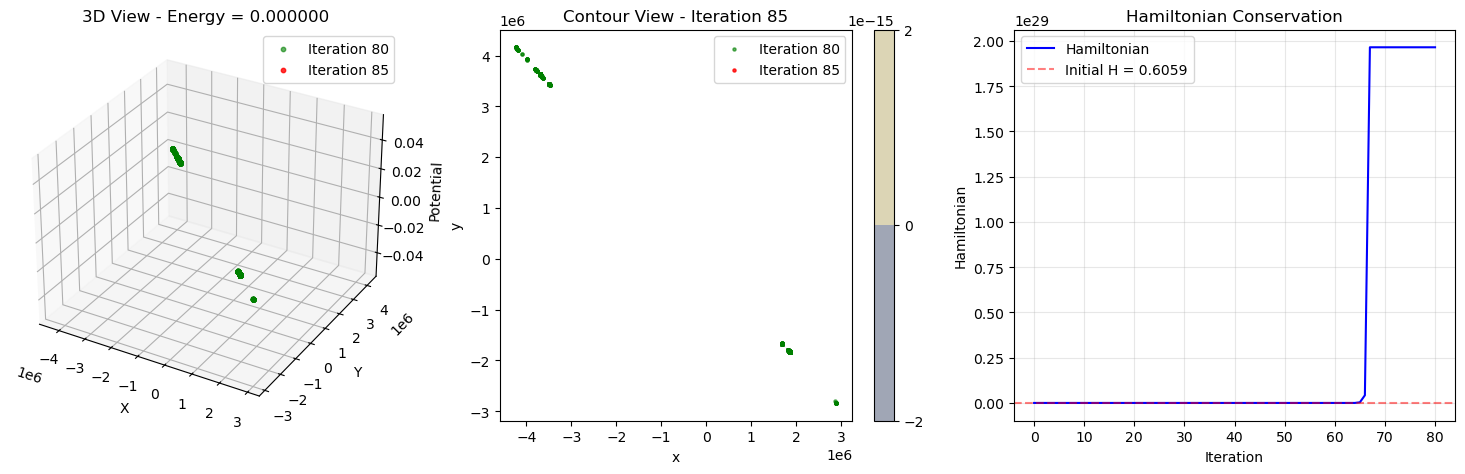

Hamiltonian Flow Progress:  91%|█████████ | 90/99 [07:58<00:45,  5.03s/it, Energy=0.000000, Hamiltonian=nan, H_drift=nan, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  90: Energy = 0.000000, Hamiltonian = nan, H_drift = nan


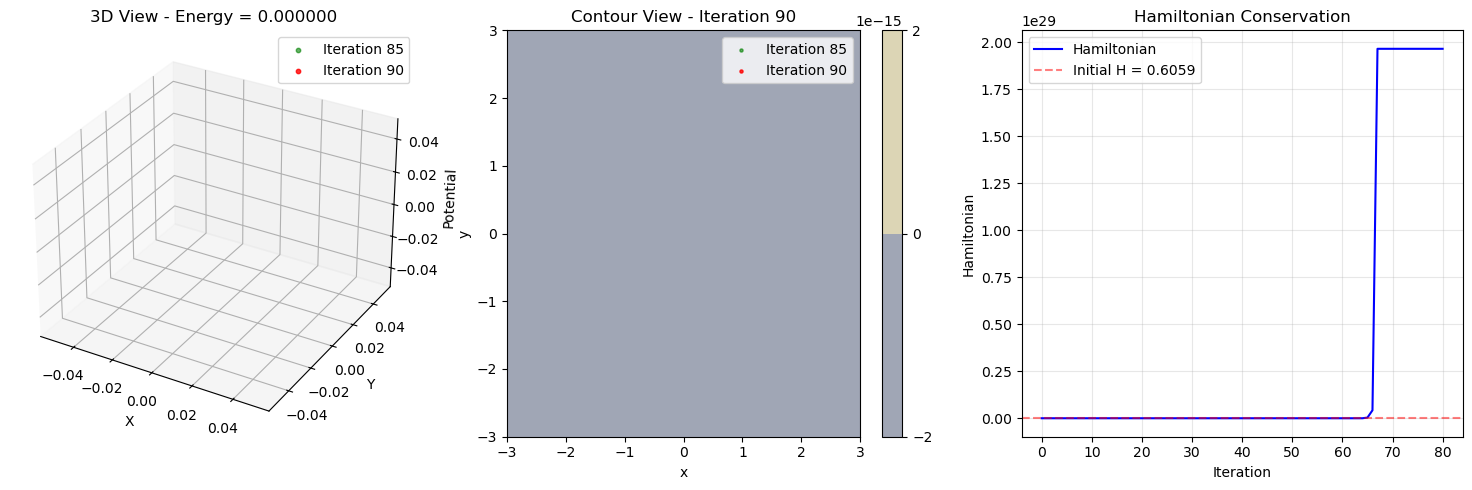

Hamiltonian Flow Progress:  96%|█████████▌| 95/99 [08:23<00:20,  5.02s/it, Energy=0.000000, Hamiltonian=nan, H_drift=nan, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  95: Energy = 0.000000, Hamiltonian = nan, H_drift = nan


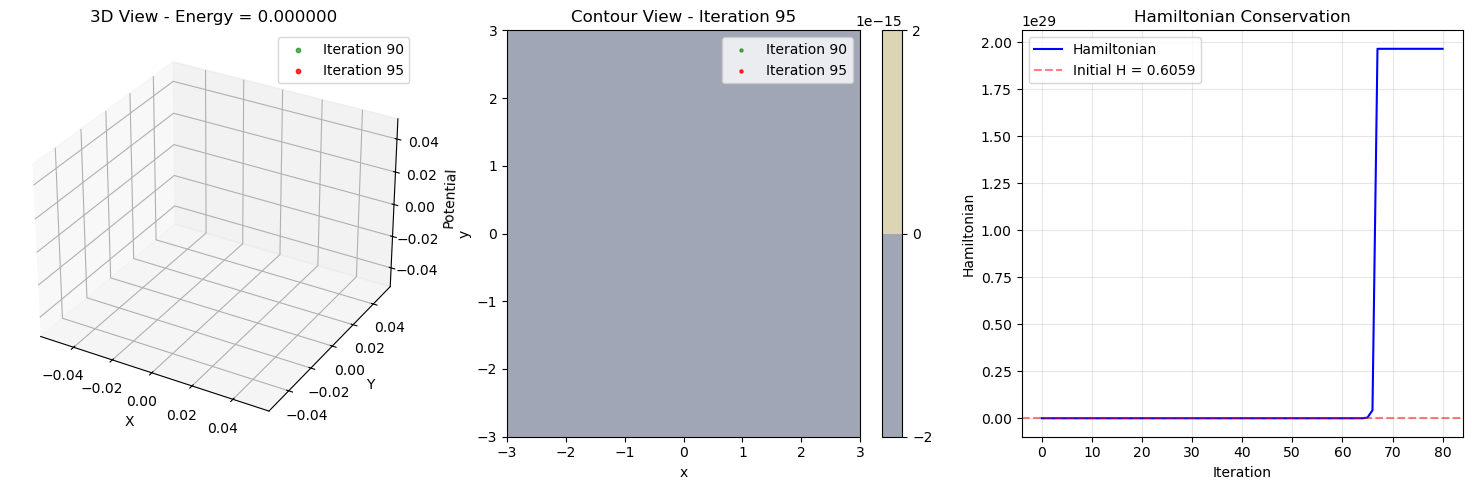

Hamiltonian Flow Progress:  99%|█████████▉| 98/99 [08:39<00:05,  5.06s/it, Energy=0.000000, Hamiltonian=nan, H_drift=nan, Linear=0.000000, Internal=0.000000, Interaction=0.000000]

Iter  98: Energy = 0.000000, Hamiltonian = nan, H_drift = nan


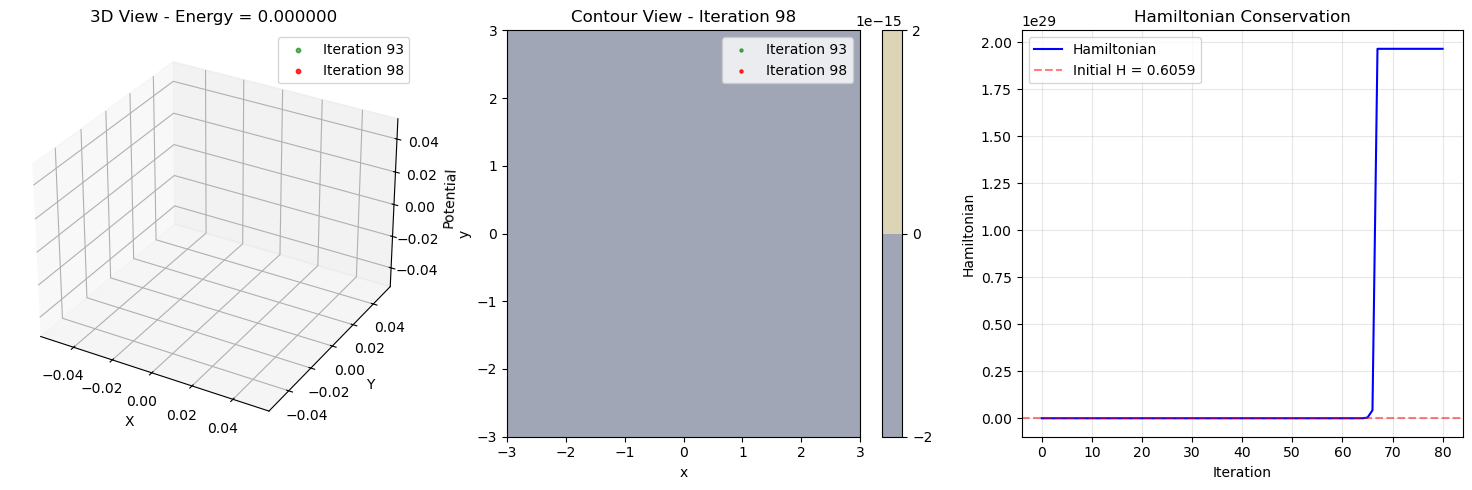

Hamiltonian Flow Progress: 100%|██████████| 99/99 [08:39<00:00,  5.25s/it, Energy=0.000000, Hamiltonian=nan, H_drift=nan, Linear=0.000000, Internal=0.000000, Interaction=0.000000]


=== Hamiltonian Integration Complete ===
Total iterations:         99
Initial Hamiltonian:      0.605894
Final Hamiltonian:        nan
Total Hamiltonian drift:  nan
Relative drift:           nan
Final energy:             0.000000
Final momentum norm:      nan
Final param norm:         nan


In [40]:
results = run_hamiltonian_flow(
    node=parametric_model,
    z_samples=z_samples,
    G_mat=G_mat,
    potential=potential,
    phi_fn=phi_fn,
    max_iterations=100,
    n_iters=3,
    h=step_size,
    solver=solver,
    progress_every=5,
    solver_maxiter=10
)